In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

In [2]:
# Data Loading and Preprocessing
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=1000, shuffle=False)

In [3]:
class FNNModel(nn.Module):
    def __init__(self):
        super(FNNModel, self).__init__()
        self.fc1 = nn.Linear(28*28, 256)
        self.bn1 = nn.BatchNorm1d(256)
        self.dropout = nn.Dropout(0.5)
        self.fc2 = nn.Linear(256, 10)
    
    def forward(self, x):
        x = x.view(-1, 28*28)
        x = F.relu(self.bn1(self.fc1(x)))
        x = self.dropout(x)
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

In [4]:
model = FNNModel()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [5]:
train_loss_history = []
test_loss_history = []

In [6]:
def train(model, train_loader, optimizer, criterion, epoch):
    model.train()
    running_loss = 0.0
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    avg_loss = running_loss / len(train_loader)
    train_loss_history.append(avg_loss)
    print(f'Epoch {epoch}, Training Loss: {avg_loss}')

In [7]:
def test(model, test_loader, criterion):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            output = model(data)
            test_loss += criterion(output, target).item()
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()
    avg_loss = test_loss / len(test_loader)
    test_loss_history.append(avg_loss)
    print(f'Test Loss: {avg_loss}, Accuracy: {100. * correct / len(test_loader.dataset)}%')

In [8]:
epochs = 10
for epoch in range(1, epochs + 1):
    train(model, train_loader, optimizer, criterion, epoch)
    test(model, test_loader, criterion)

Epoch 1, Training Loss: 0.3158187963195574
Test Loss: 0.1487106304615736, Accuracy: 95.5%
Epoch 2, Training Loss: 0.18948727495062834
Test Loss: 0.11430093236267566, Accuracy: 96.64%
Epoch 3, Training Loss: 0.15084645018549458
Test Loss: 0.09905907455831767, Accuracy: 97.01%
Epoch 4, Training Loss: 0.13753481887217398
Test Loss: 0.0886783318594098, Accuracy: 97.31%
Epoch 5, Training Loss: 0.11954681898779007
Test Loss: 0.08250026237219572, Accuracy: 97.6%
Epoch 6, Training Loss: 0.11286908563282062
Test Loss: 0.07397679351270199, Accuracy: 97.73%
Epoch 7, Training Loss: 0.10009189681616673
Test Loss: 0.07583592068403959, Accuracy: 97.78%
Epoch 8, Training Loss: 0.09633846928490632
Test Loss: 0.07375488709658384, Accuracy: 97.72%
Epoch 9, Training Loss: 0.09242874386507882
Test Loss: 0.07098646480590105, Accuracy: 97.89%
Epoch 10, Training Loss: 0.08578510915806918
Test Loss: 0.06837706426158548, Accuracy: 97.92%


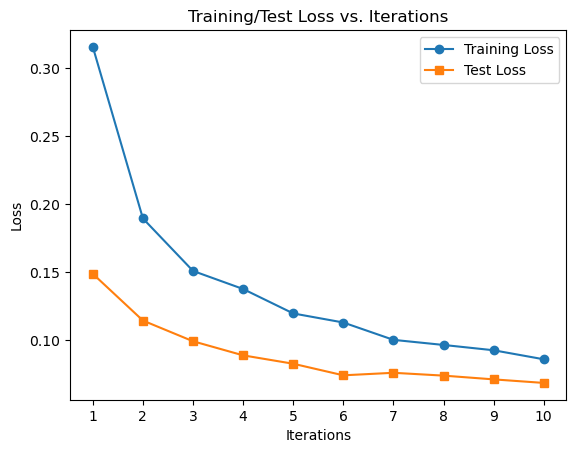

In [13]:
plt.plot(train_loss_history, label='Training Loss', marker='o')
plt.plot(test_loss_history, label='Test Loss', marker='s')
plt.title('Training/Test Loss vs. Iterations')
plt.xticks(range(len(train_loss_history)), range(1, len(train_loss_history) + 1))
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [14]:
# This code is inspired by the following reference: [MNISTOptim](https://github.com/kamileren/MNISTOptim)